<a href="https://colab.research.google.com/github/juniors719/dry_bean_classifier/blob/main/dry_bean_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Classificação de Variedades de Feijão Seco

Este notebook apresenta uma análise completa do conjunto de dados de feijão seco, incluindo pré-processamento, modelagem e avaliação de algoritmos de machine learning para classificação das variedades.

Autores:
- Francisco Djalma Pereira da Silva Júnior - 554222
- Pablo Vinícios da Silva Araújo - 574229
- Francisco Leudes Bezerra Neto - 552478

# Preparando o ambiente e baixando os dados

### Instalação das bibliotecas

In [175]:
%pip install pandas matplotlib openpyxl

### Importação das biliotecas

In [176]:
# Bibliotecas fundamentais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter

# Scikit-learn: Modelos e pré-processamento
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Scikit-learn: Validação e métricas
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

# Importação dos dados

### Carregando o conjunto de dados a partir de um arquivo Excel

In [177]:
df = pd.read_excel("https://github.com/juniors719/dry_bean_classifier/raw/refs/heads/main/DryBeanDataset/Dry_Bean_Dataset.xlsx")

O conjunto de dados de feijão seco é carregado diretamente de um arquivo Excel hospedado no GitHub usando a função read_excel do pandas.

### Visualização das primeiras linhas

In [178]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


O método `head()` foi utilizado para visualizar as primeiras 5 linhas do DataFrame. Isso ajuda a obter uma visão inicial dos dados, incluindo as colunas e alguns valores de amostra.

### Informações gerais sobre o dataset

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

O método `describe()` é utilizado para gerar estatísticas descritivas, como a média, desvio padrão, valores mínimo e máximo, e os quartis das colunas numéricas do DataFrame.

### Estatísticas descritivas

In [180]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


O método `describe()` é utilizado para gerar estatísticas descritivas, como a média, desvio padrão, valores mínimo e máximo, e os quartis das colunas numéricas do DataFrame.

# Visualização dos Dados

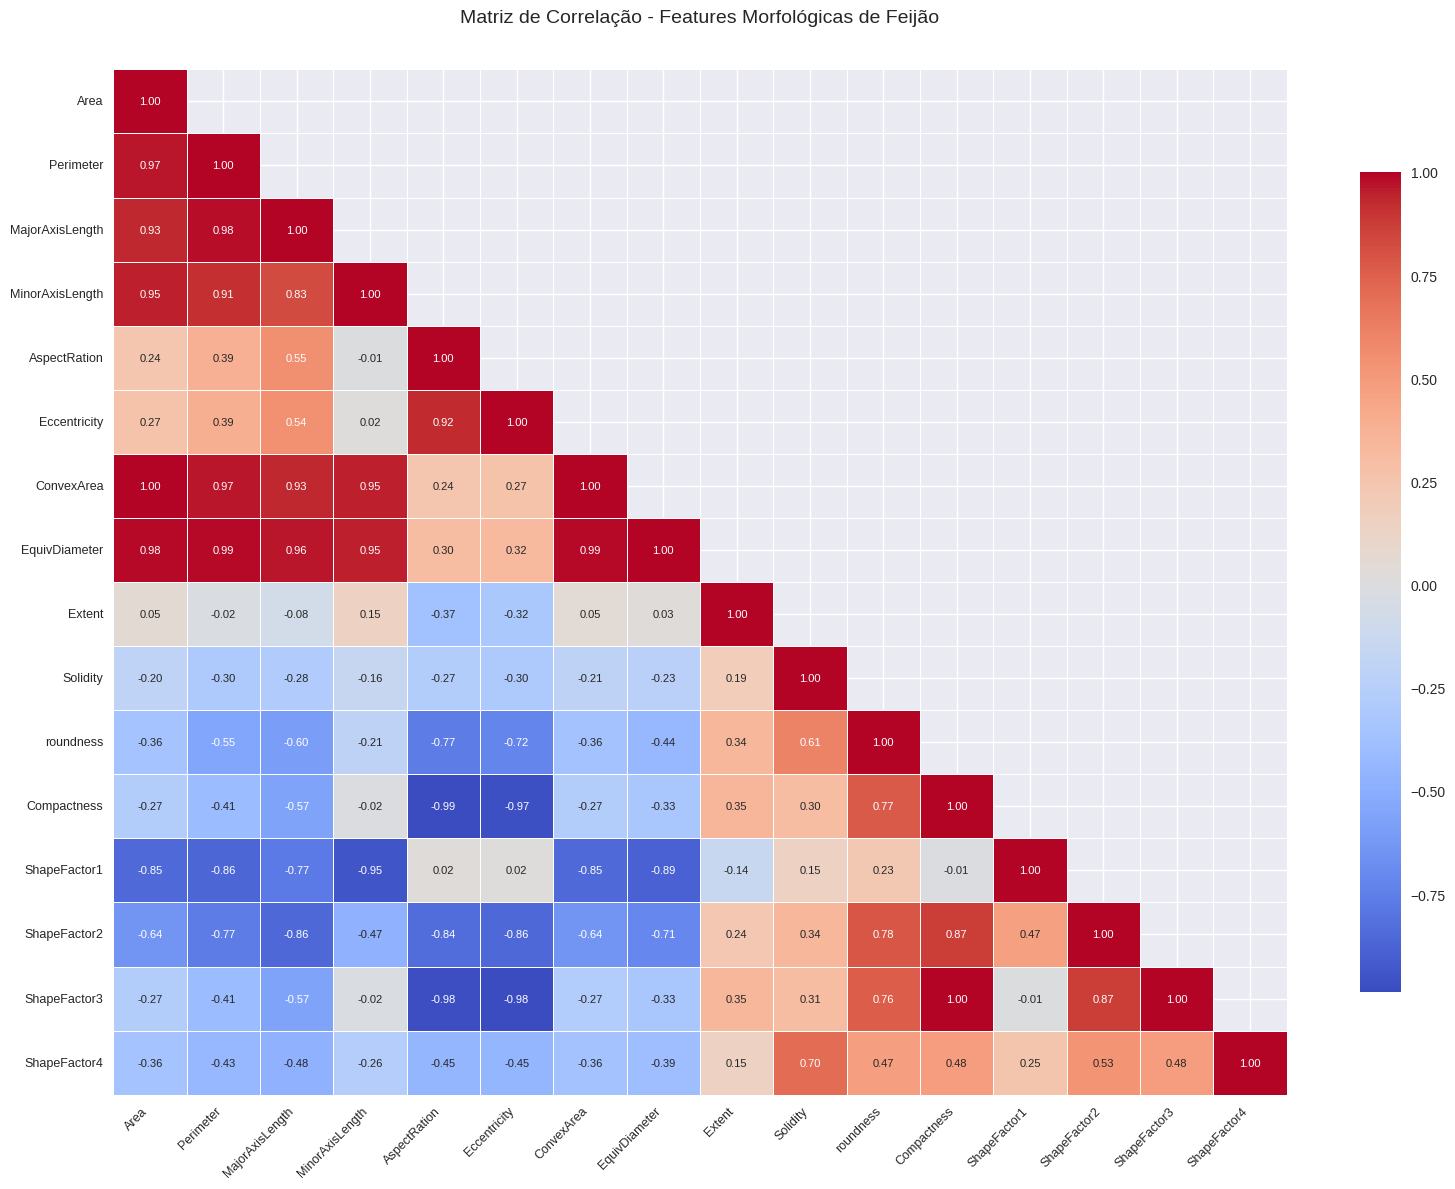

In [181]:
mask = np.triu(np.ones_like(df.corr(numeric_only=True)), k=1)

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            mask=mask,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 8})

plt.title('Matriz de Correlação - Features Morfológicas de Feijão\n',
         fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

Esse heatmap de correlação mostra o quanto os atributos numéricos  estão relacionados entre si. A correlação varia de -1 a 1:

- 1.00 = correlação perfeita positiva: quando um atributo aumenta, o outro também aumenta.

- -1.00 = correlação perfeita negativa: quando um aumenta, o outro diminui.

- 0.00 = sem correlação linear aparente.

### Visualização da distribuição das classes de feijão no conjunto de dados

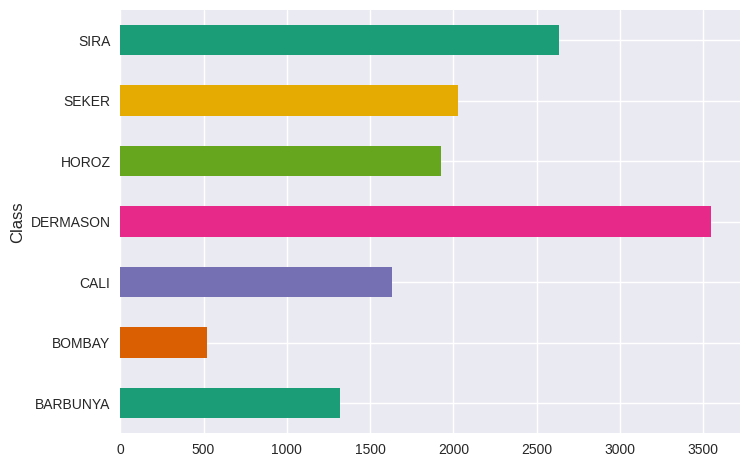

In [182]:
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Foi gerada uma visualização da distribuição das diferentes classes de feijão no conjunto de dados utilizando um gráfico de barras horizontais. Esse gráfico mostra o número de amostras de cada classe, facilitando a análise da representatividade das diferentes variedades de feijão presentes no dataset.

### Visualização da distribuição da feature "Area" no conjunto de dados com histograma

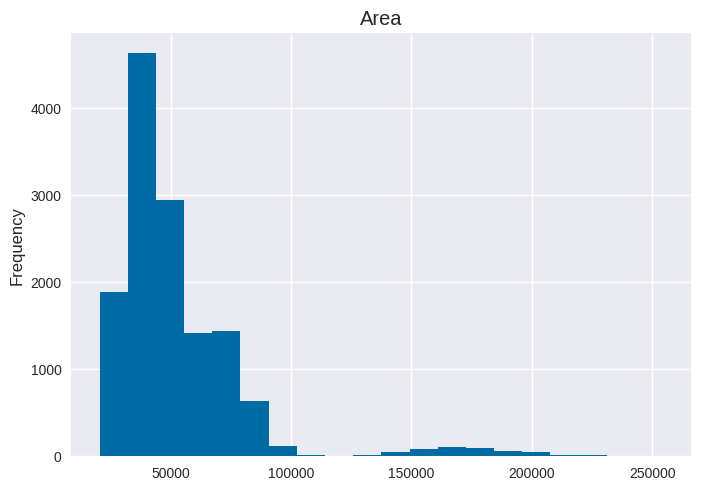

In [183]:
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

A distribuição da feature "Area" foi visualizada por meio de um histograma, utilizando 20 bins. Esse gráfico permite observar a frequência das diferentes áreas dos grãos de feijão, oferecendo insights sobre a concentração de valores e possíveis variações entre os dados.

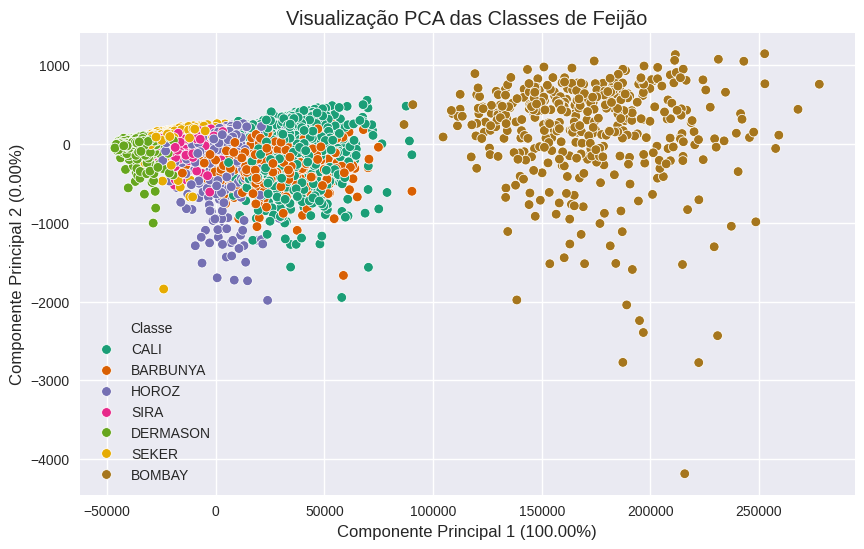

In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette='Dark2')
plt.title('Visualização PCA das Classes de Feijão')
plt.xlabel(f'Componente Principal 1 ({explained_variance_ratio[0]:.2%})')
plt.ylabel(f'Componente Principal 2 ({explained_variance_ratio[1]:.2%})')
plt.legend(title='Classe')
plt.show()

### Verificar dados ausentes

In [185]:
missing_values = df.isnull().sum()

print(missing_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


A verificação de dados ausentes revelou que o conjunto de dados está completo, sem valores ausentes em nenhuma das colunas. Todos os campos, incluindo as características e a classe, estão totalmente preenchidos.

Foi utilizdo o método `isnull().sum()` para contar quantos valores ausentes existem em cada coluna do DataFrame. Como a saída mostra 0 para todas as colunas, significa que não há dados faltando no conjunto.

In [186]:
duplicados = df.duplicated()

print(f"Número de linhas duplicadas: {duplicados.sum()}")

Número de linhas duplicadas: 68


In [187]:
df = df.drop_duplicates()

duplicados = df.duplicated()

print(f"Número de linhas duplicadas: {duplicados.sum()}")

Número de linhas duplicadas: 0


# Divisão dos dados

### Definição de X (features) e y (target)

In [188]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

As features (variáveis independentes) foram atribuídas à variável X, enquanto a variável-alvo (classe do grão) foi atribuída à variável y. A coluna "Class", que representa o tipo de feijão, foi separada das demais variáveis numéricas para posterior treinamento dos modelos de classificação.

In [189]:
print("Distribuição das classes antes do balanceamento:", Counter(y))

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribuição das classes depois do balanceamento:", Counter(y_resampled))

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

Distribuição das classes antes do balanceamento: Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1860, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
Distribuição das classes depois do balanceamento: Counter({'SEKER': 3546, 'BARBUNYA': 3546, 'BOMBAY': 3546, 'CALI': 3546, 'HOROZ': 3546, 'SIRA': 3546, 'DERMASON': 3546})


### Split do dataset em treino e teste (80/20) com estratificação

In [190]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

O conjunto de dados foi dividido em 80% para treino e 20% para teste utilizando o train_test_split. O parâmetro stratify=y garante que a distribuição das classes seja proporcional nos dois conjuntos, mesmo para as classes com menos representatividade. A utilização de random_state=42 assegura a reprodutibilidade dos resultados.

In [191]:
print("Adicionei esses print pra gente visualizar melhor")
print("\nDistribuição das classes no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição das classes no teste:")
print(y_test.value_counts(normalize=True))

Adicionei esses print pra gente visualizar melhor

Distribuição das classes no treino:
Class
DERMASON    0.261861
SIRA        0.194665
SEKER       0.149622
HOROZ       0.137345
CALI        0.120362
BARBUNYA    0.097563
BOMBAY      0.038582
Name: proportion, dtype: float64

Distribuição das classes no teste:
Class
DERMASON    0.261720
SIRA        0.194537
SEKER       0.149871
HOROZ       0.137320
CALI        0.120340
BARBUNYA    0.097822
BOMBAY      0.038391
Name: proportion, dtype: float64


Note que, ao exibir a distribuição das classes nos conjuntos de treino e teste, podemos observar que as proporções de cada classe são muito semelhantes em ambos os conjuntos. Isso confirma que a estratificação foi realizada corretamente.

# Pré-processamento dos dados

### Escalonamento de características

In [192]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Média do treino (após escalonamento):", X_train_scaled.mean(axis=0))
print("Desvio padrão do treino (após escalonamento):", X_train_scaled.std(axis=0))

Média do treino (após escalonamento): [-6.09936076e-17  2.52500418e-16 -1.73143144e-16 -5.22052813e-16
  9.46384685e-16  3.63338264e-16  1.00344322e-16 -4.45318920e-16
 -2.67584859e-16 -2.63695697e-14 -1.18937535e-15  4.80078718e-16
  3.54156431e-16  1.02311858e-16 -3.49565514e-16 -3.57173319e-15]
Desvio padrão do treino (após escalonamento): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Após o escalonamento com o StandardScaler, as médias das colunas do conjunto de treino estão muito próximas de zero, o que indica que o escalonamento foi bem-sucedido. O objetivo do StandardScaler é centralizar os dados em torno de zero.

Além disso, o desvio padrão de todas as variáveis é 1, como esperado, pois o StandardScaler também ajusta os dados para ter um desvio padrão de 1. Isso é importante para garantir que as variáveis tenham a mesma escala, evitando que variáveis com maior magnitude dominem o modelo.

# Treinamento

### Definindo os modelos

In [193]:
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 20]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 20],
            "min_samples_split": [2, 12, 20]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    }
}

Foi definido um dicionário com os modelos que serão avaliados: Random Forest, Decision Tree e K-Nearest Neighbors (KNN). Para cada modelo, especificamos o objeto do classificador e um conjunto de hiperparâmetros que serão explorados durante o processo de validação cruzada com GridSearchCV. Essa abordagem permite encontrar a combinação de parâmetros que resulta no melhor desempenho para cada modelo.

### Avaliação dos Modelos com Validação Cruzada e Métricas de Desempenho

In [194]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, scaled=False):
    results = []
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, config in models.items():
        print(f"\nTreinando {model_name} (Escalonado: {scaled})...")

        grid_search = GridSearchCV(
            config["model"],
            config["params"],
            cv=kfold,
            scoring="accuracy",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_

        y_train_pred = best_model.predict(X_train)
        print(f"\nClassification Report (Treino) - {model_name}:")
        print(classification_report(y_train, y_train_pred))

        cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)

        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append({
            "Modelo": model_name,
            "Melhores Parâmetros": grid_search.best_params_,
            "Acurácia (Validação Cruzada)": grid_search.best_score_,
            "Acurácia (Teste)": accuracy,
            "Precisão": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Escalonado": scaled
        })

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm, annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_
        )
        plt.title(f"Matriz de Confusão - {model_name} (Escalonado: {scaled})")
        plt.xlabel("Predito")
        plt.ylabel("Real")
        plt.show()

        if (model_name != "KNN"):
          importances = best_model.feature_importances_
          features = X.columns

          feature_importance = pd.DataFrame({
              'Feature': features,
              'Importance': importances
          }).sort_values('Importance', ascending=False)

          # Plotar
          plt.figure(figsize=(12, 8))
          sns.barplot(data=feature_importance,
                    x='Importance',
                    y='Feature',
                    palette='viridis_r')

          plt.title('Importância das Features - Random Forest\n', fontsize=14)
          plt.xlabel('Score de Importância', fontsize=12)
          plt.ylabel('')
          plt.xticks(fontsize=10)
          plt.yticks(fontsize=10)
          plt.grid(axis='x', linestyle='--', alpha=0.7)
          sns.despine(left=True)
          plt.tight_layout()
          plt.show()

    return pd.DataFrame(results)

Nesta etapa, realizamos o treinamento e a avaliação de cada modelo utilizando validação cruzada estratificada (K-Fold com 5 divisões), com busca de hiperparâmetros via GridSearchCV. Para cada modelo, são coletadas as seguintes métricas sobre o conjunto de teste: acurácia, precisão, recall e F1-score (todas com média ponderada). Também é exibida a matriz de confusão para análise mais detalhada dos erros de classificação. A flag `scaled` indica se os dados foram escalonados previamente. Os resultados são armazenados e retornados como um DataFrame para posterior análise e visualização.

### Treinamento



Treinando Random Forest (Escalonado: False)...

Classification Report (Treino) - Random Forest:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       1.00      1.00      1.00      1304
    DERMASON       1.00      1.00      1.00      2837
       HOROZ       1.00      1.00      1.00      1488
       SEKER       1.00      1.00      1.00      1621
        SIRA       0.99      1.00      1.00      2109

    accuracy                           1.00     10834
   macro avg       1.00      1.00      1.00     10834
weighted avg       1.00      1.00      1.00     10834



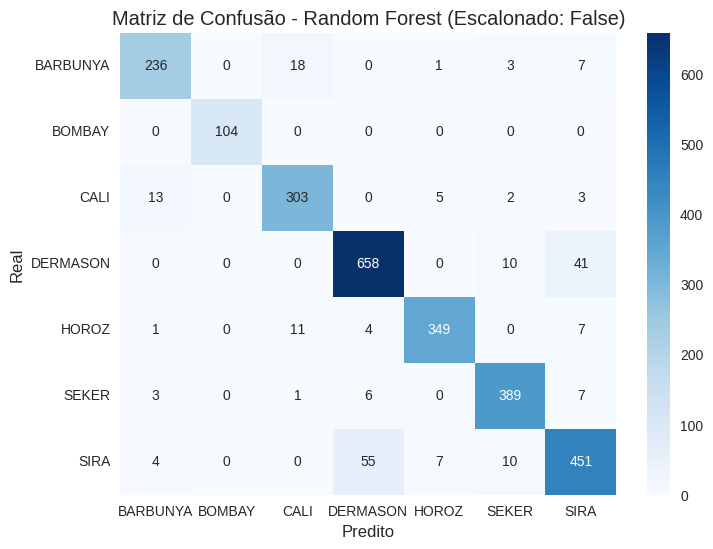

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


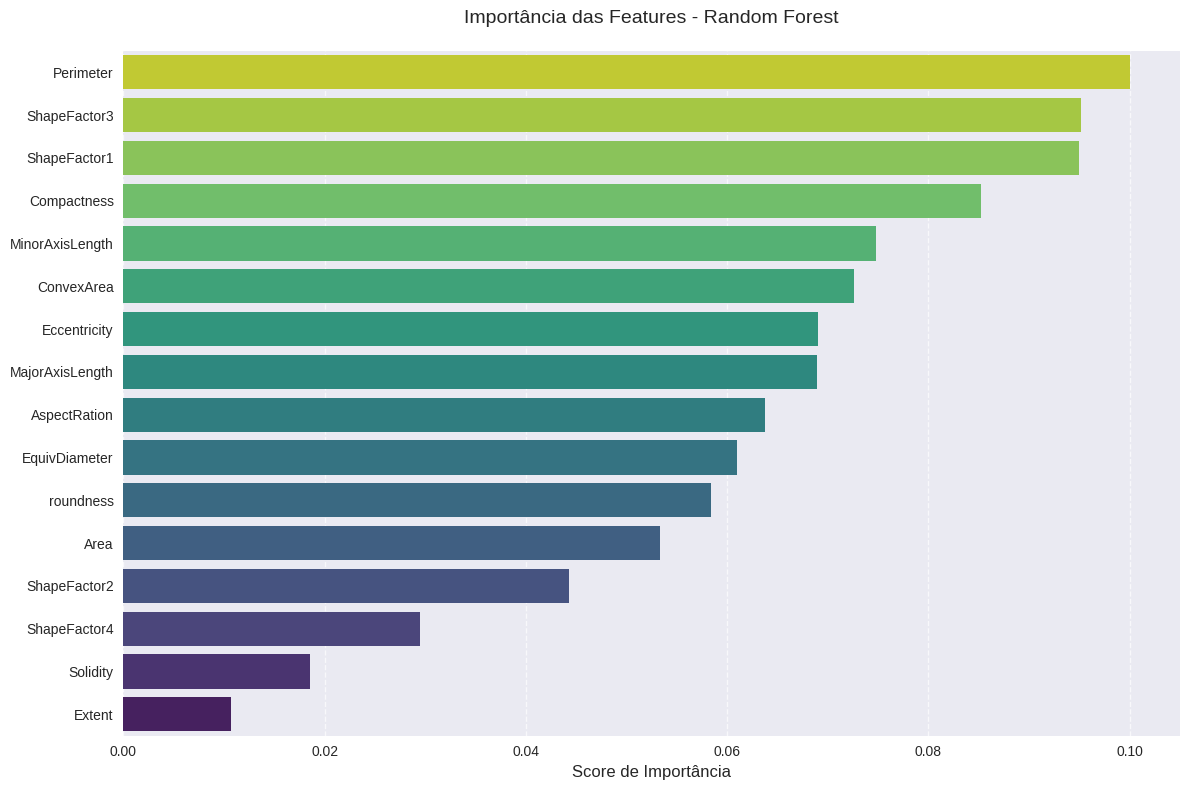


Treinando Decision Tree (Escalonado: False)...

Classification Report (Treino) - Decision Tree:
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       0.96      0.96      0.96      1304
    DERMASON       0.95      0.97      0.96      2837
       HOROZ       0.97      0.97      0.97      1488
       SEKER       0.97      0.97      0.97      1621
        SIRA       0.94      0.92      0.93      2109

    accuracy                           0.96     10834
   macro avg       0.97      0.96      0.96     10834
weighted avg       0.96      0.96      0.96     10834



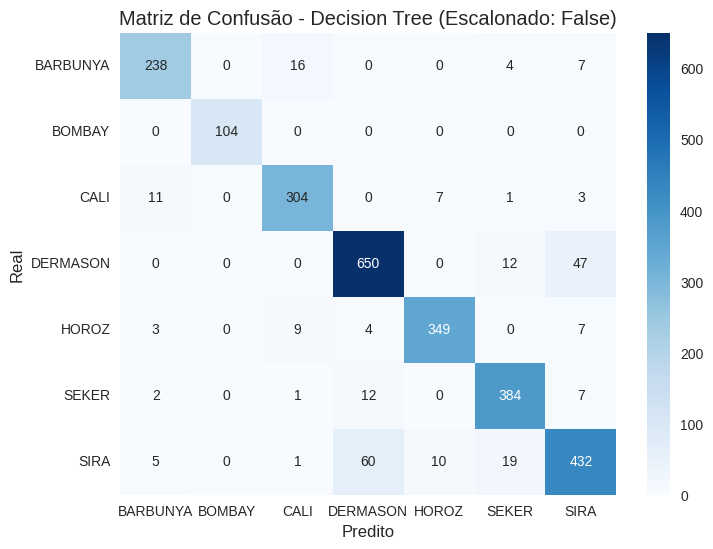

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


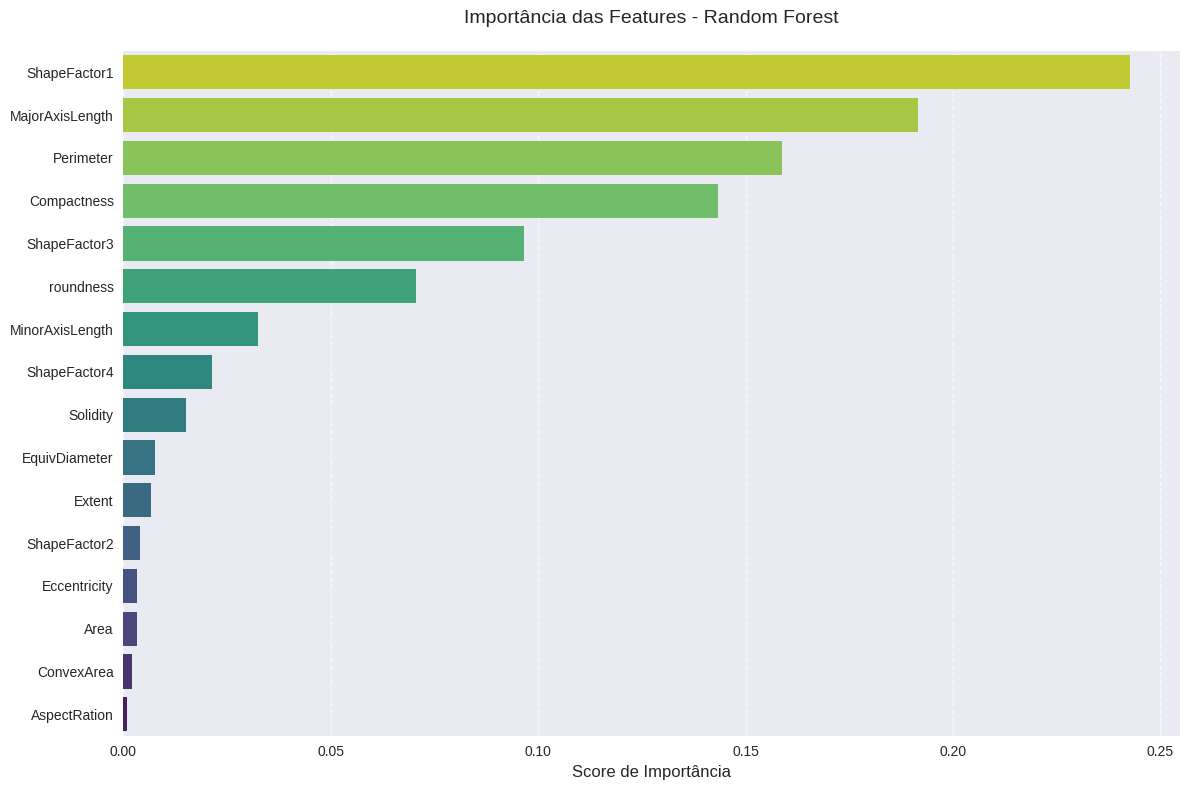


Treinando KNN (Escalonado: False)...

Classification Report (Treino) - KNN:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       1.00      1.00      1.00      1304
    DERMASON       1.00      1.00      1.00      2837
       HOROZ       1.00      1.00      1.00      1488
       SEKER       1.00      1.00      1.00      1621
        SIRA       1.00      1.00      1.00      2109

    accuracy                           1.00     10834
   macro avg       1.00      1.00      1.00     10834
weighted avg       1.00      1.00      1.00     10834



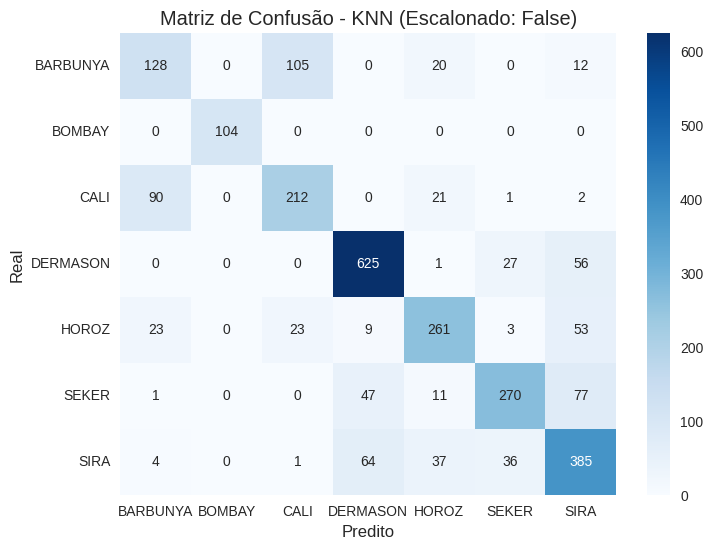


Treinando Random Forest (Escalonado: True)...

Classification Report (Treino) - Random Forest:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       1.00      1.00      1.00      1304
    DERMASON       1.00      1.00      1.00      2837
       HOROZ       1.00      1.00      1.00      1488
       SEKER       1.00      1.00      1.00      1621
        SIRA       0.99      1.00      1.00      2109

    accuracy                           1.00     10834
   macro avg       1.00      1.00      1.00     10834
weighted avg       1.00      1.00      1.00     10834



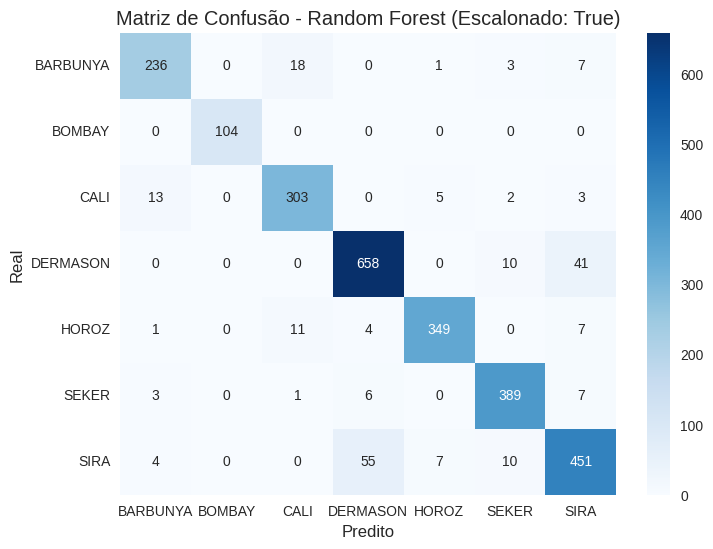

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


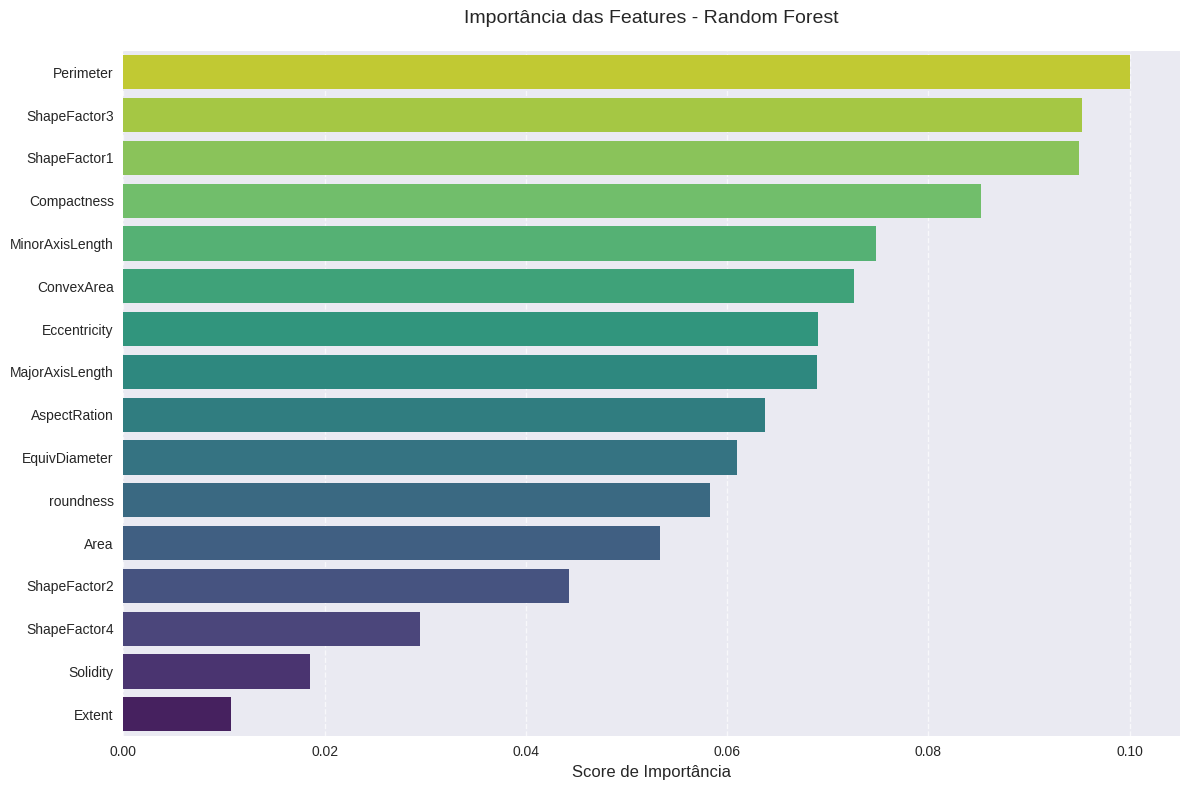


Treinando Decision Tree (Escalonado: True)...

Classification Report (Treino) - Decision Tree:
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       0.96      0.96      0.96      1304
    DERMASON       0.95      0.97      0.96      2837
       HOROZ       0.97      0.97      0.97      1488
       SEKER       0.97      0.97      0.97      1621
        SIRA       0.94      0.92      0.93      2109

    accuracy                           0.96     10834
   macro avg       0.97      0.96      0.96     10834
weighted avg       0.96      0.96      0.96     10834



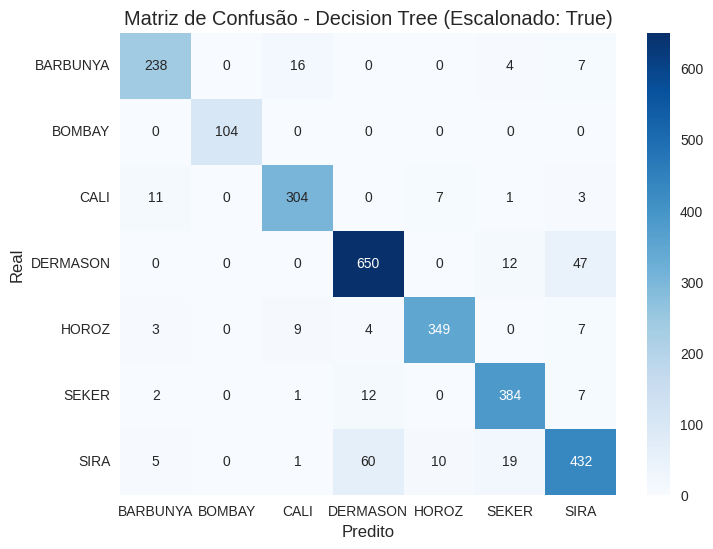

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


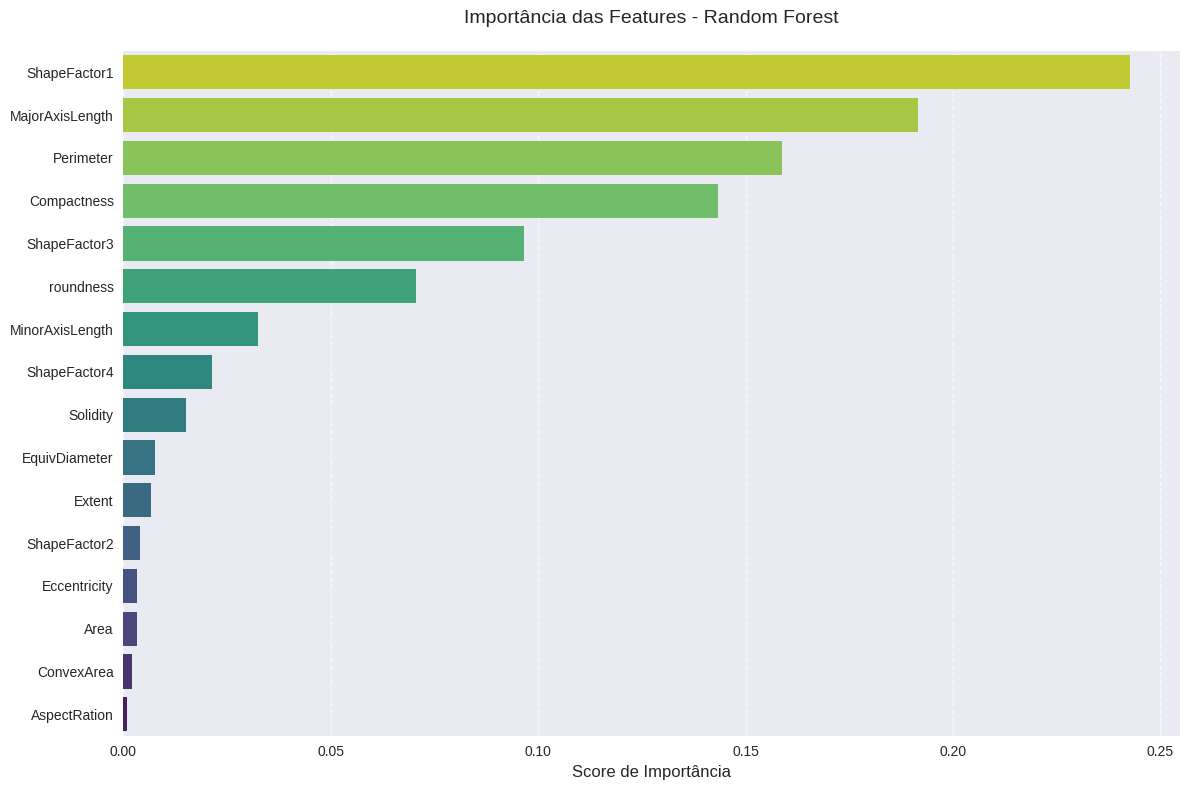


Treinando KNN (Escalonado: True)...

Classification Report (Treino) - KNN:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       1.00      1.00      1.00      1304
    DERMASON       1.00      1.00      1.00      2837
       HOROZ       1.00      1.00      1.00      1488
       SEKER       1.00      1.00      1.00      1621
        SIRA       1.00      1.00      1.00      2109

    accuracy                           1.00     10834
   macro avg       1.00      1.00      1.00     10834
weighted avg       1.00      1.00      1.00     10834



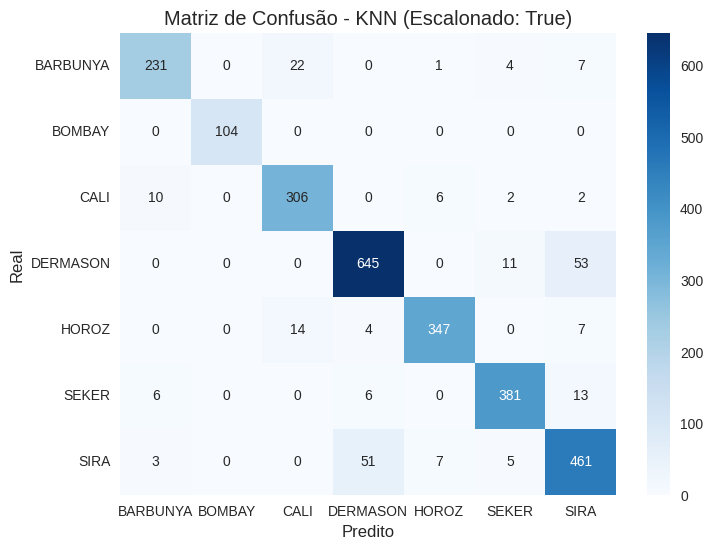

In [195]:
# Dados NÃO escalonados
results_no_scale = train_and_evaluate_models(X_train, X_test, y_train, y_test, scaled=False)

# Dados Escalonados
results_scaled = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, scaled=True)

# Combina resultados
final_results = pd.concat([results_no_scale, results_scaled], ignore_index=True)

Nesta etapa, os modelos são treinados e avaliados duas vezes: primeiro com os dados originais (não escalonados) e, em seguida, com os dados escalonados. O objetivo é verificar o impacto do pré-processamento por escalonamento no desempenho dos modelos. Após as execuções, os resultados de ambas as abordagens são combinados em um único DataFrame, permitindo uma comparação direta entre as métricas obtidas com e sem normalização dos dados.

# Visualização Comparativa dos Desempenhos dos Modelos

In [196]:
print("Resultados dos Modelos:")
display(final_results.sort_values(by="Acurácia (Teste)", ascending=False))


Resultados dos Modelos:


,Modelo,Melhores Parâmetros,Acurácia (Validação Cruzada),Acurácia (Teste),Precisão,Recall,F1-Score,Escalonado
0,Random Forest,"{'max_depth': 20, 'n_estimators': 100}",0.923944,0.919158,0.919149,0.919158,0.919041,False
3,Random Forest,"{'max_depth': 20, 'n_estimators': 100}",0.923944,0.919158,0.919149,0.919158,0.919041,True
5,KNN,"{'n_neighbors': 7, 'weights': 'distance'}",0.923667,0.913621,0.914400,0.913621,0.913803,True
1,Decision Tree,"{'max_depth': 20, 'min_samples_split': 20}",0.901699,0.908453,0.908171,0.908453,0.908123,False
4,Decision Tree,"{'max_depth': 20, 'min_samples_split': 20}",0.901699,0.908453,0.908171,0.908453,0.908123,True
2,KNN,"{'n_neighbors': 3, 'weights': 'distance'}",0.730848,0.732743,0.733882,0.732743,0.731669,False


Os resultados dos modelos são exibidos e comparados visualmente por meio de gráficos de barras. São analisadas as principais métricas de avaliação: Acurácia, Precisão, Recall e F1-Score, todas calculadas com base no conjunto de teste. Cada gráfico compara o desempenho dos modelos com e sem escalonamento dos dados, permitindo identificar quais algoritmos se beneficiam desse pré-processamento. Essa visualização facilita a análise do impacto do escalonamento em cada métrica e modelo.

Ao analisar os resultados, observamos que os modelos Decision Tree e Random Forest apresentaram desempenhos semelhantes tanto com dados escalonados quanto não escalonados. Isso ocorre porque esses algoritmos baseados em árvores não são sensíveis à escala dos dados, já que suas decisões são tomadas com base em divisões relativas nos atributos, e não em distâncias absolutas. Em contrapartida, o modelo KNN apresentou um desempenho significativamente inferior quando os dados não foram escalonados. Isso era esperado, pois o KNN é altamente dependente da noção de distância entre os pontos, o que torna essencial a padronização dos dados para evitar que atributos com maiores magnitudes dominem o cálculo das distâncias e distorçam os resultados.

   Modelo + Escalonado           Métrica     Valor
0  Random Forest (Não)  Acurácia (Teste)  0.919158
1  Decision Tree (Não)  Acurácia (Teste)  0.908453
2            KNN (Não)  Acurácia (Teste)  0.732743
3  Random Forest (Sim)  Acurácia (Teste)  0.919158
4  Decision Tree (Sim)  Acurácia (Teste)  0.908453


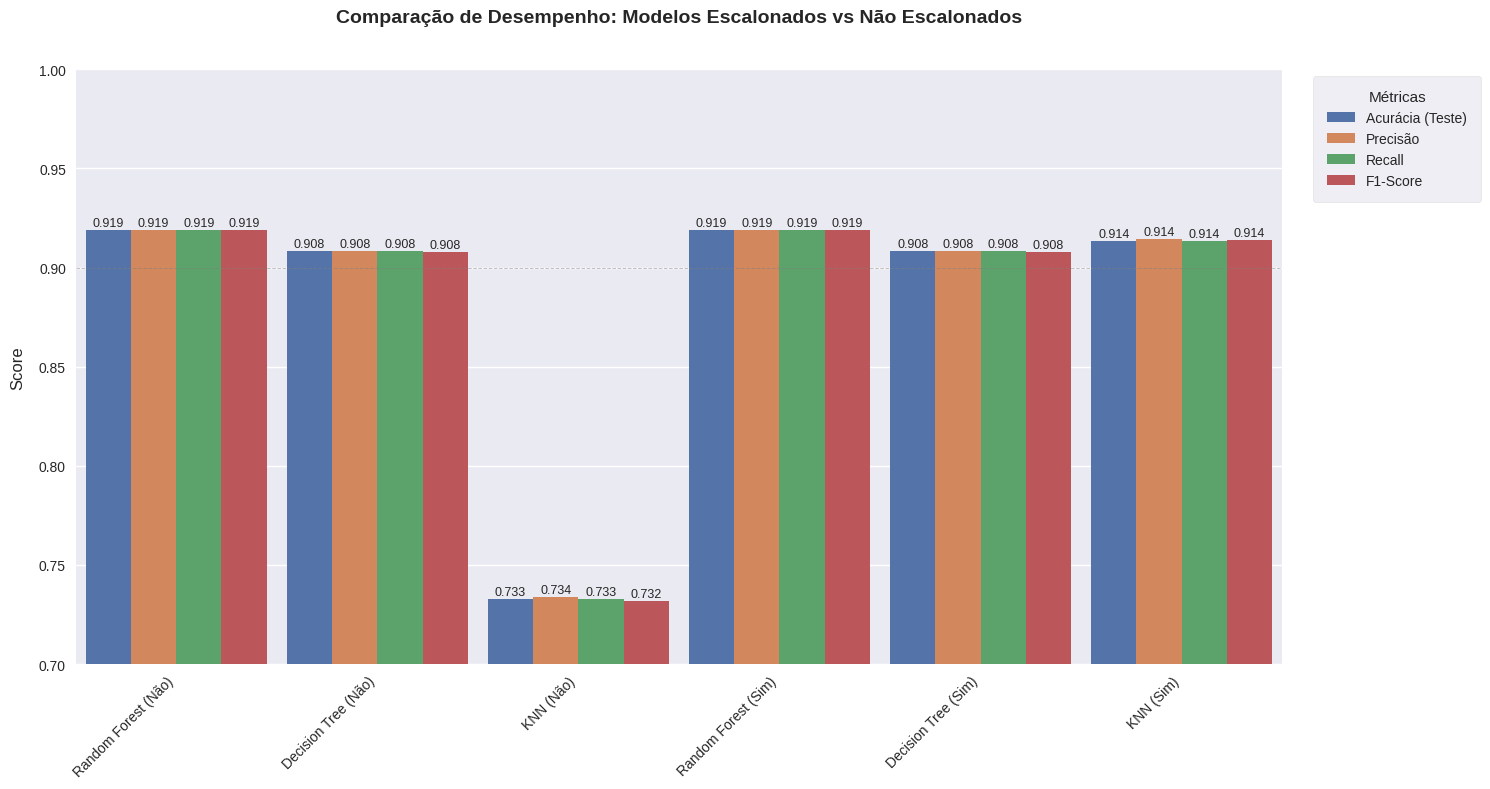

In [197]:
# Criar uma coluna combinada para facilitar a visualização
final_results['Modelo + Escalonado'] = final_results['Modelo'] + ' (' + final_results['Escalonado'].apply(lambda x: 'Sim' if x else 'Não') + ')'

# Selecionar as colunas que você quer plotar
plot_df = final_results[['Modelo + Escalonado', 'Acurácia (Teste)', 'Precisão', 'Recall', 'F1-Score']]

# Usar pandas.melt para transformar o DataFrame para o formato longo
plot_data = pd.melt(plot_df,
                    id_vars=['Modelo + Escalonado'],
                    value_vars=['Acurácia (Teste)', 'Precisão', 'Recall', 'F1-Score'],
                    var_name='Métrica',
                    value_name='Valor')

# Exibir as primeiras linhas de plot_data para verificar o formato
print(plot_data.head())


# Configuração de estilo
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo mais clean com grid sutil
palette = sns.color_palette("deep", 4)  # Paleta moderna com 4 cores (uma para cada métrica)

# Criar figura
plt.figure(figsize=(15, 8))

# Gráfico de barras refinado
ax = sns.barplot(
    data=plot_data,
    x='Modelo + Escalonado',
    y='Valor',
    hue='Métrica',
    palette=palette,
    saturation=0.85,  # Saturação das cores
    width=0.9,       # Largura das barras (mais finas)
    err_kws={'linewidth': 1}      # Largura das barras de erro
)

# Ajustes estéticos
plt.title('Comparação de Desempenho: Modelos Escalonados vs Não Escalonados\n',
          fontsize=14, fontweight='bold', pad=20)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('', fontsize=12)
plt.ylabel('Score', fontsize=12, labelpad=10)

# Legendas aprimoradas
legend = plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    fontsize=10,
    title='Métricas',
    title_fontsize='11',
    borderpad=1
)
legend.get_frame().set_edgecolor('#DDDDDD')

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.3f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=9
    )

# Linha de referência
ax.axhline(y=0.9, color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Ajustes finais
sns.despine(left=True)  # Remove borda esquerda
plt.tight_layout()
plt.show()

In [198]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled_df,y_resampled_df,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled_df
)

In [199]:
scaler = StandardScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test_resampled)

print("Média do treino (após escalonamento):", X_train_resampled_scaled.mean(axis=0))
print("Desvio padrão do treino (após escalonamento):", X_train_resampled_scaled.std(axis=0))

Média do treino (após escalonamento): [-3.66775598e-17 -3.35554943e-16 -1.05917636e-16  6.92042932e-16
  5.45332693e-16  3.87171899e-16 -4.43709016e-17  7.32388248e-16
 -1.52113470e-15  3.84720765e-15 -5.42470055e-16 -7.89372652e-16
 -2.11835272e-16  1.36333173e-16 -6.71288801e-16  9.43812016e-15]
Desvio padrão do treino (após escalonamento): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



Treinando Random Forest (Escalonado: False)...

Classification Report (Treino) - Random Forest:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      2837
      BOMBAY       1.00      1.00      1.00      2837
        CALI       1.00      1.00      1.00      2837
    DERMASON       1.00      1.00      1.00      2836
       HOROZ       1.00      1.00      1.00      2837
       SEKER       1.00      1.00      1.00      2837
        SIRA       1.00      1.00      1.00      2836

    accuracy                           1.00     19857
   macro avg       1.00      1.00      1.00     19857
weighted avg       1.00      1.00      1.00     19857



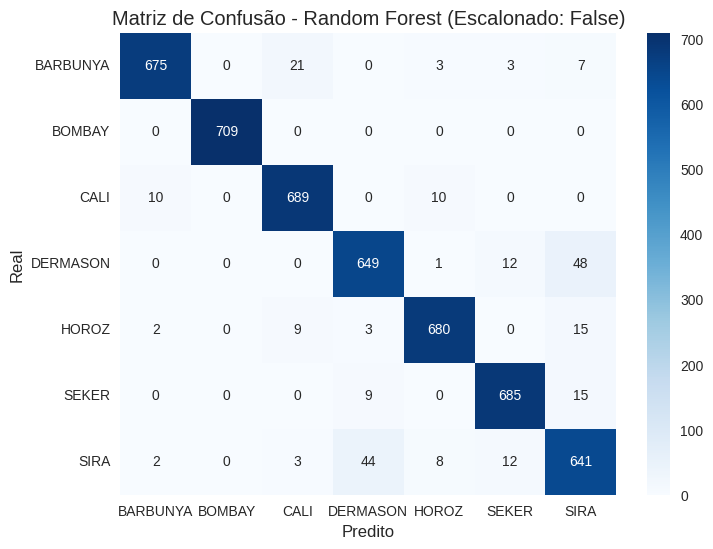

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


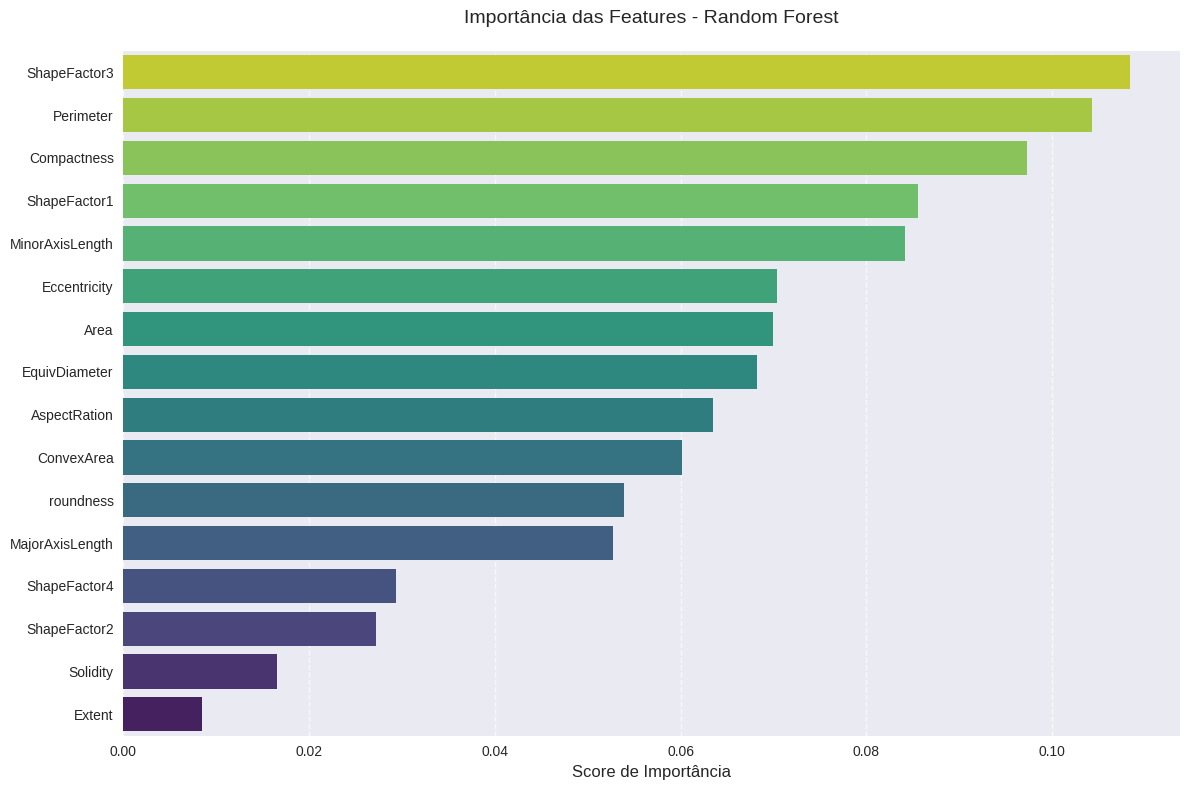


Treinando Decision Tree (Escalonado: False)...

Classification Report (Treino) - Decision Tree:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.98      0.98      2837
      BOMBAY       1.00      1.00      1.00      2837
        CALI       0.98      0.98      0.98      2837
    DERMASON       0.95      0.98      0.97      2836
       HOROZ       0.99      0.98      0.99      2837
       SEKER       0.98      0.98      0.98      2837
        SIRA       0.97      0.95      0.96      2836

    accuracy                           0.98     19857
   macro avg       0.98      0.98      0.98     19857
weighted avg       0.98      0.98      0.98     19857



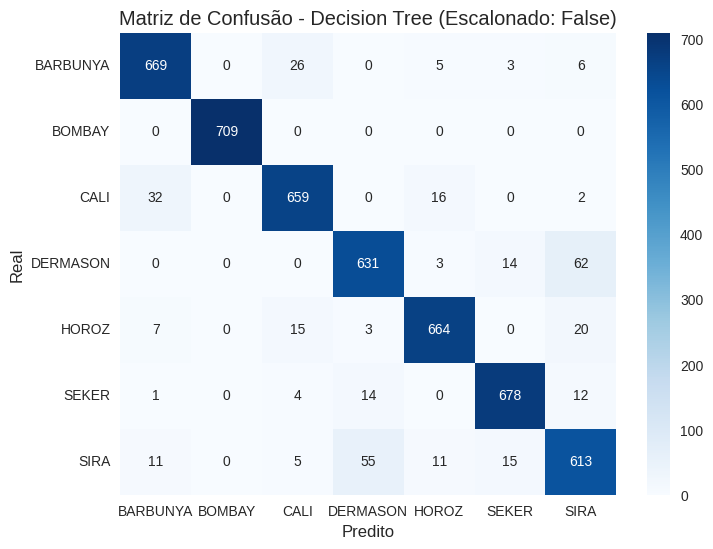

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


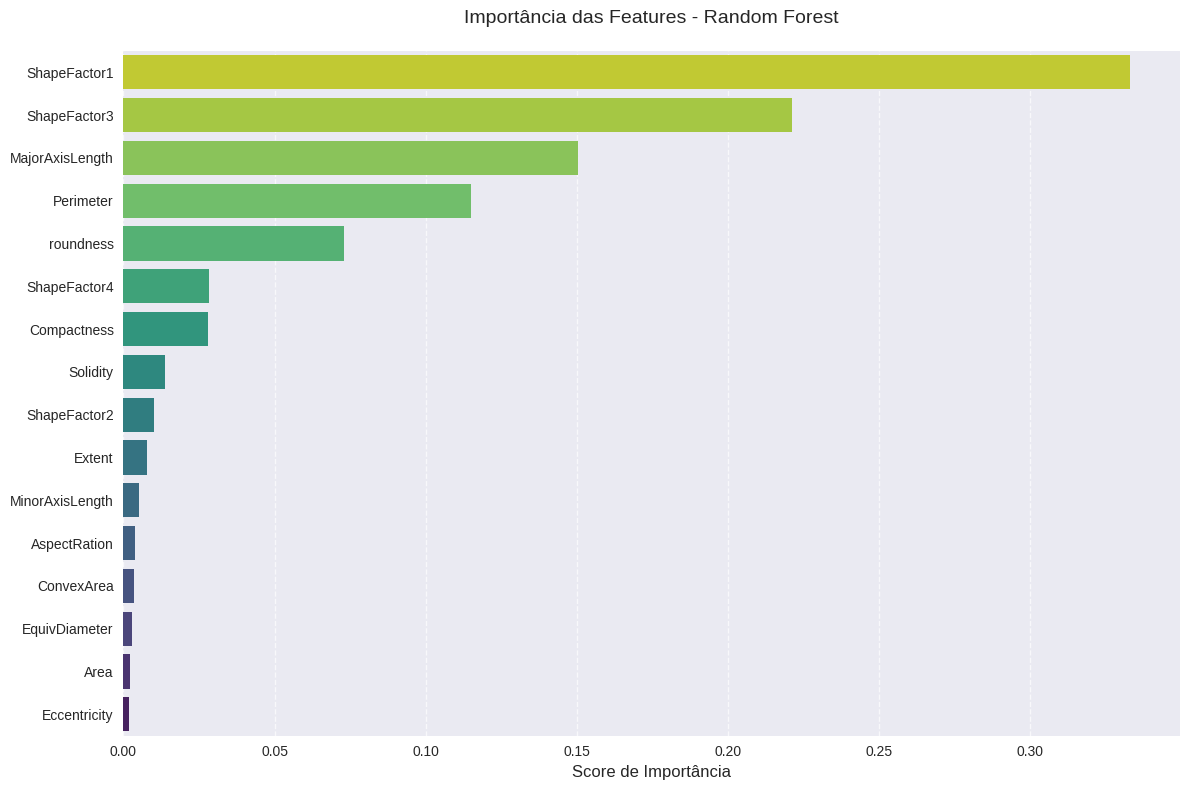


Treinando KNN (Escalonado: False)...

Classification Report (Treino) - KNN:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      2837
      BOMBAY       1.00      1.00      1.00      2837
        CALI       1.00      1.00      1.00      2837
    DERMASON       1.00      1.00      1.00      2836
       HOROZ       1.00      1.00      1.00      2837
       SEKER       1.00      1.00      1.00      2837
        SIRA       1.00      1.00      1.00      2836

    accuracy                           1.00     19857
   macro avg       1.00      1.00      1.00     19857
weighted avg       1.00      1.00      1.00     19857



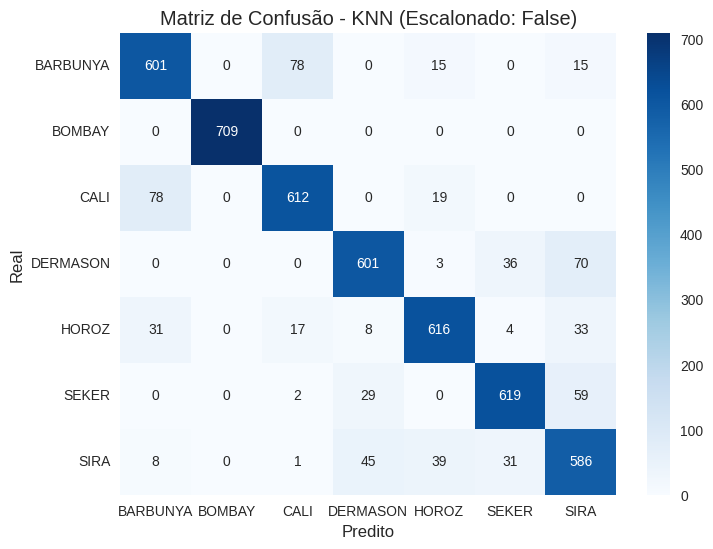


Treinando Random Forest (Escalonado: True)...

Classification Report (Treino) - Random Forest:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      2837
      BOMBAY       1.00      1.00      1.00      2837
        CALI       1.00      1.00      1.00      2837
    DERMASON       1.00      1.00      1.00      2836
       HOROZ       1.00      1.00      1.00      2837
       SEKER       1.00      1.00      1.00      2837
        SIRA       0.99      1.00      0.99      2836

    accuracy                           1.00     19857
   macro avg       1.00      1.00      1.00     19857
weighted avg       1.00      1.00      1.00     19857



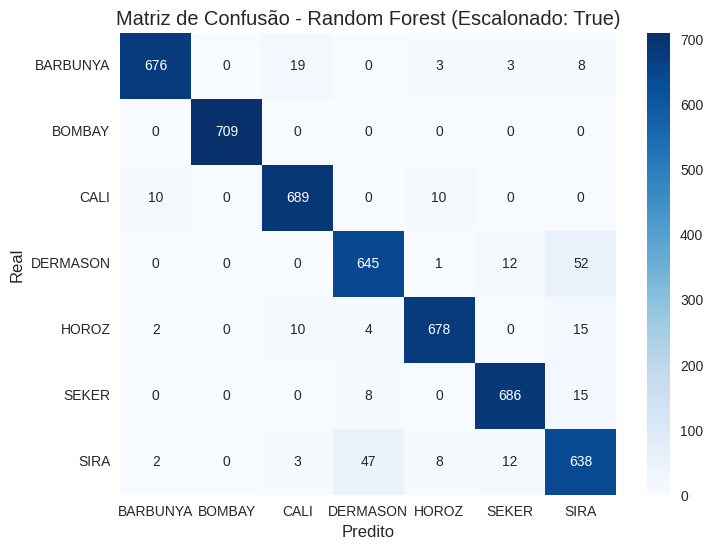

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


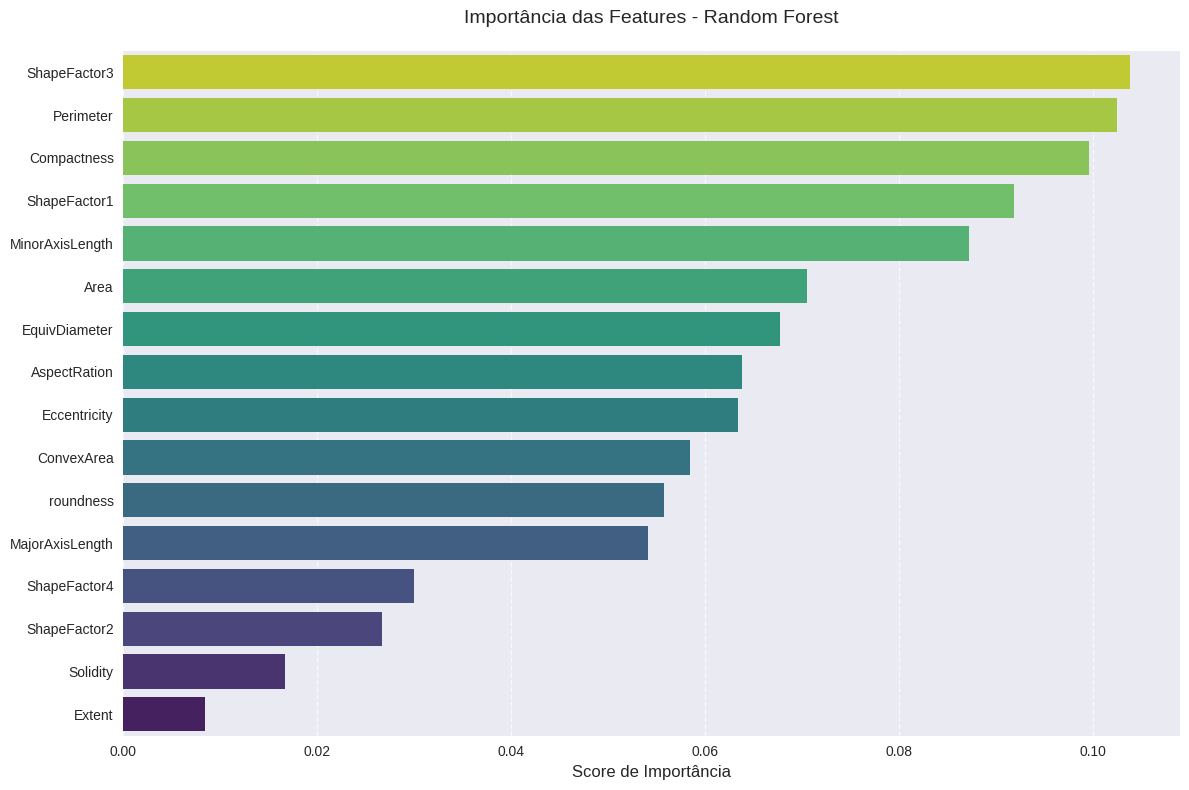


Treinando Decision Tree (Escalonado: True)...

Classification Report (Treino) - Decision Tree:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.98      0.98      2837
      BOMBAY       1.00      1.00      1.00      2837
        CALI       0.98      0.98      0.98      2837
    DERMASON       0.95      0.98      0.97      2836
       HOROZ       0.99      0.98      0.99      2837
       SEKER       0.98      0.98      0.98      2837
        SIRA       0.97      0.95      0.96      2836

    accuracy                           0.98     19857
   macro avg       0.98      0.98      0.98     19857
weighted avg       0.98      0.98      0.98     19857



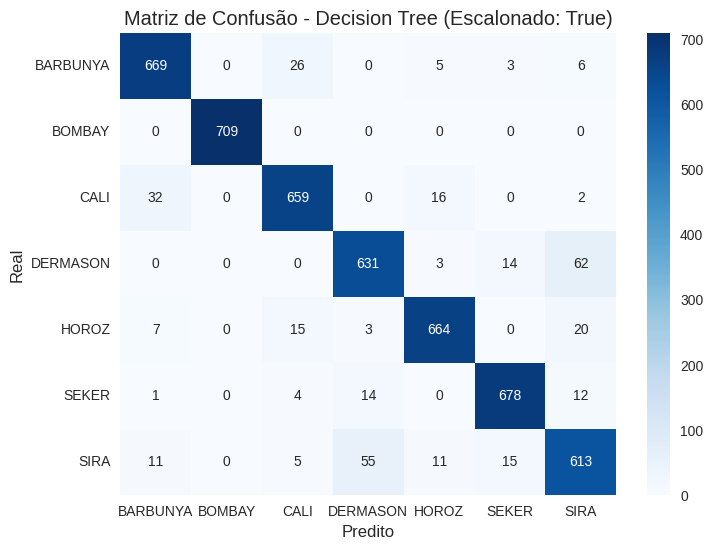

<ipython-input-194-cd0e378df376>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,


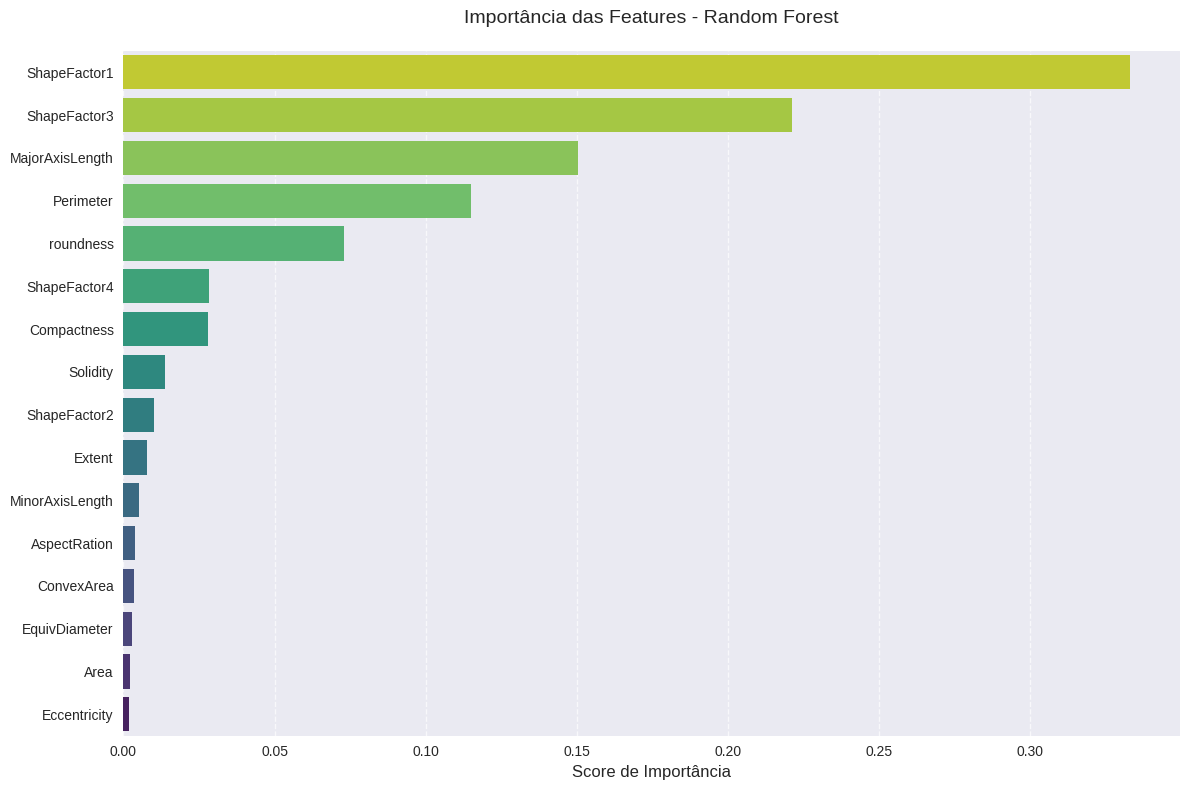


Treinando KNN (Escalonado: True)...

Classification Report (Treino) - KNN:
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      2837
      BOMBAY       1.00      1.00      1.00      2837
        CALI       1.00      1.00      1.00      2837
    DERMASON       1.00      1.00      1.00      2836
       HOROZ       1.00      1.00      1.00      2837
       SEKER       1.00      1.00      1.00      2837
        SIRA       1.00      1.00      1.00      2836

    accuracy                           1.00     19857
   macro avg       1.00      1.00      1.00     19857
weighted avg       1.00      1.00      1.00     19857



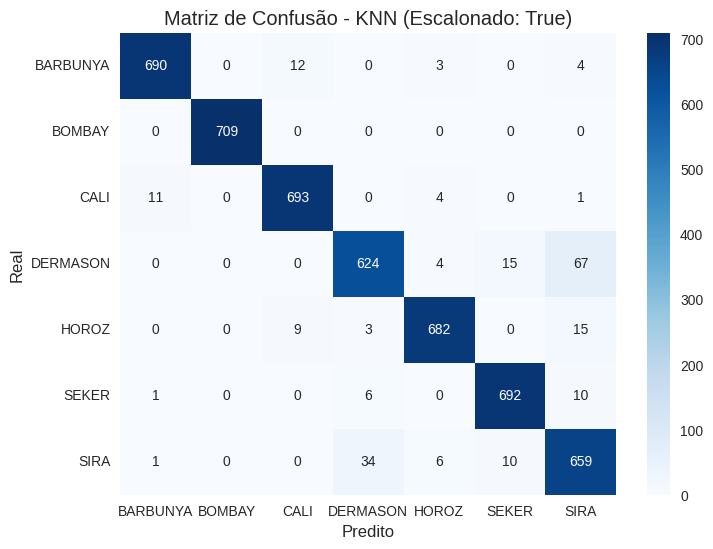

In [201]:
# Dados NÃO escalonados
results_no_scale_resampled = train_and_evaluate_models(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, scaled=False)

# Dados Escalonados
results_scaled_resampled = train_and_evaluate_models(X_train_resampled_scaled, X_test_resampled_scaled, y_train_resampled, y_test_resampled, scaled=True)

# Combina resultados
final_results_resampled = pd.concat([results_no_scale_resampled, results_scaled_resampled], ignore_index=True)

    Modelo + Escalonado           Métrica     Valor
0   Random Forest (Não)  Acurácia (Teste)  0.952266
1   Decision Tree (Não)  Acurácia (Teste)  0.931118
2             KNN (Não)  Acurácia (Teste)  0.874924
3   Random Forest (Sim)  Acurácia (Teste)  0.950856
4   Decision Tree (Sim)  Acurácia (Teste)  0.931118
5             KNN (Sim)  Acurácia (Teste)  0.956495
6   Random Forest (Não)          Precisão  0.952580
7   Decision Tree (Não)          Precisão  0.931182
8             KNN (Não)          Precisão  0.876301
9   Random Forest (Sim)          Precisão  0.951206
10  Decision Tree (Sim)          Precisão  0.931182
11            KNN (Sim)          Precisão  0.957140
12  Random Forest (Não)            Recall  0.952266
13  Decision Tree (Não)            Recall  0.931118
14            KNN (Não)            Recall  0.874924
15  Random Forest (Sim)            Recall  0.950856
16  Decision Tree (Sim)            Recall  0.931118
17            KNN (Sim)            Recall  0.956495
18  Random F

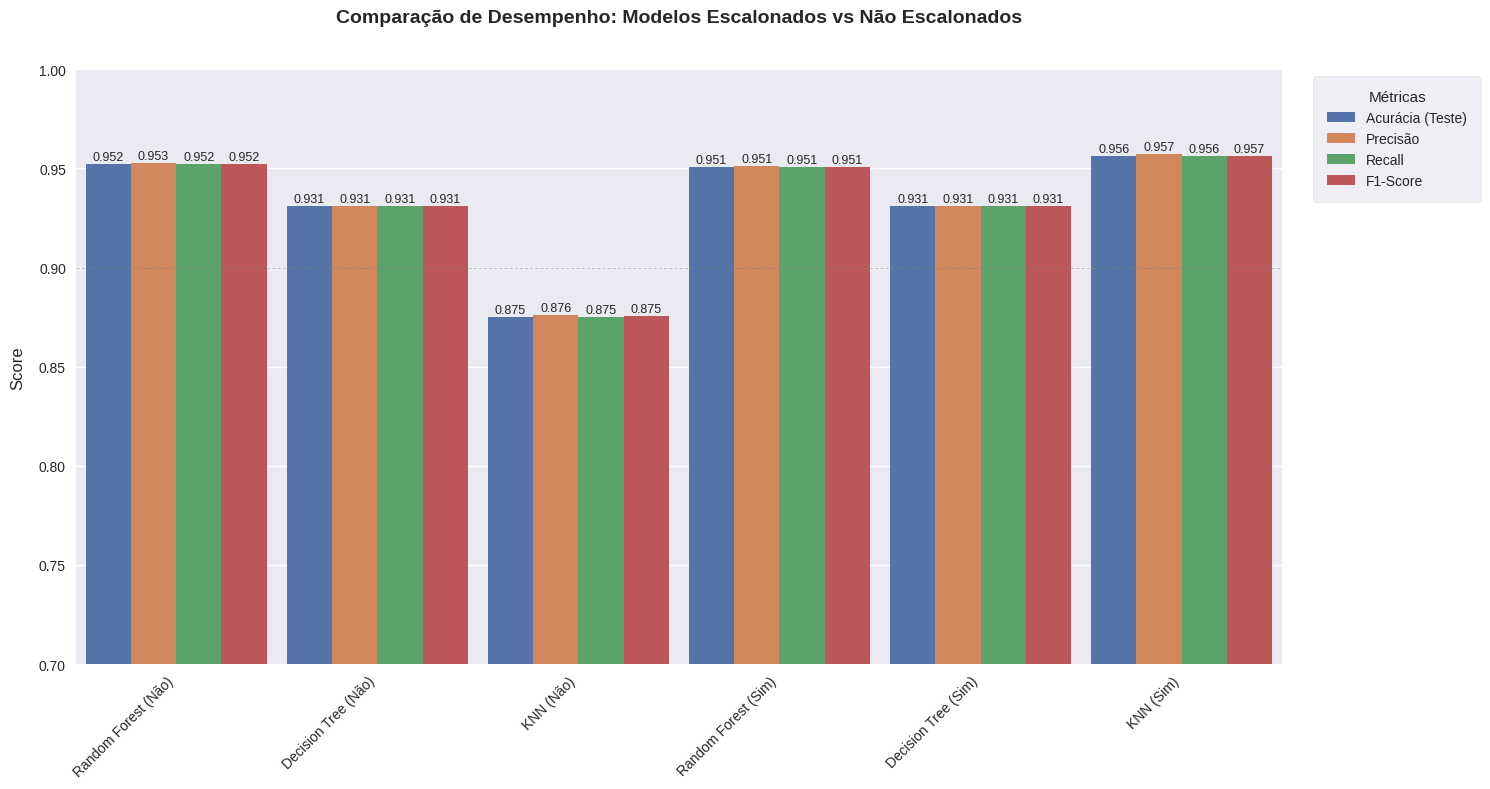

In [202]:
# Criar uma coluna combinada para facilitar a visualização
final_results_resampled['Modelo + Escalonado'] = final_results_resampled['Modelo'] + ' (' + final_results_resampled['Escalonado'].apply(lambda x: 'Sim' if x else 'Não') + ')'

# Selecionar as colunas que você quer plotar
plot_df = final_results_resampled[['Modelo + Escalonado', 'Acurácia (Teste)', 'Precisão', 'Recall', 'F1-Score']]

# Usar pandas.melt para transformar o DataFrame para o formato longo
plot_data = pd.melt(plot_df,
                    id_vars=['Modelo + Escalonado'],
                    value_vars=['Acurácia (Teste)', 'Precisão', 'Recall', 'F1-Score'],
                    var_name='Métrica',
                    value_name='Valor')

# Exibir as primeiras linhas de plot_data para verificar o formato
print(plot_data)


# Configuração de estilo
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo mais clean com grid sutil
palette = sns.color_palette("deep", 4)  # Paleta moderna com 4 cores (uma para cada métrica)

# Criar figura
plt.figure(figsize=(15, 8))

# Gráfico de barras refinado
ax = sns.barplot(
    data=plot_data,
    x='Modelo + Escalonado',
    y='Valor',
    hue='Métrica',
    palette=palette,
    saturation=0.85,  # Saturação das cores
    width=0.9,       # Largura das barras (mais finas)
    err_kws={'linewidth': 1}      # Largura das barras de erro
)

# Ajustes estéticos
plt.title('Comparação de Desempenho: Modelos Escalonados vs Não Escalonados\n',
          fontsize=14, fontweight='bold', pad=20)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('', fontsize=12)
plt.ylabel('Score', fontsize=12, labelpad=10)

# Legendas aprimoradas
legend = plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    fontsize=10,
    title='Métricas',
    title_fontsize='11',
    borderpad=1
)
legend.get_frame().set_edgecolor('#DDDDDD')

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.3f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=9
    )

# Linha de referência
ax.axhline(y=0.9, color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Ajustes finais
sns.despine(left=True)  # Remove borda esquerda
plt.tight_layout()
plt.show()

# Divisão de Tarefas

- **Importação e Visualização dos Dados**: Francisco Leudes

Responsável por carregar o conjunto de dados, inspecionar suas características iniciais e realizar análises exploratórias para entender a estrutura e distribuição dos dados.

- **Pré-processamento**: Pablo Vinícius

Realizou o tratamento dos dados, como limpeza, codificação de variáveis e escalonamento, garantindo que o conjunto estivesse adequado para o treinamento dos modelos.

- **Definição dos Modelos**: Francisco Leudes, Pablo Vinícius e Francisco Djalma

O grupo discutiu e decidiu em conjunto quais algoritmos utilizar, além de definir os hiperparâmetros e estratégias de validação para cada modelo.

- **Análise dos Scores e Geração de Gráficos**: Francisco Djalma

Responsável por compilar os resultados obtidos pelos modelos, comparar os scores de avaliação (acurácia, precisão, recall, F1-score) e construir os gráficos para facilitar a interpretação dos resultados.